In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
num_cols = df.select_dtypes(include = ["int64", "float64"]).columns.tolist()
num_cols.remove("target")

In [5]:
Numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('Scalar', StandardScaler())
])

In [6]:
preprocessor = ColumnTransformer([
    ('num', Numerical_pipeline, num_cols)   
])

In [7]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [8]:
X = df.drop("target", axis = 1)
y = df["target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True)

In [10]:
X_train_pro = pd.DataFrame(pipeline.fit_transform(X_train), columns = num_cols, index = X_train.index) 

# Logistic Regression from scratch 

In [86]:
learning_rate = 1000
alpha = 0.01
cost_list = []
lr_list = []

def logistic_reg(X, y, learning_rate = 1000, alpha = 0.01):
    X["bias"] = 1
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(learning_rate):
        z = np.dot(X, theta)
        h_x = 1/(1 + np.exp(-z))
        
        cost = (-1/m)*np.sum((y* np.log(h_x)) + ((1-y)*np.log(1-h_x)))
        
        grad = (1/m)* np.dot(X.T, (h_x - y))
        
        theta -= alpha*grad
        
        cost_list.append(cost)
        lr_list.append(i)
        
    return theta, cost_list, lr_list 

In [87]:
final_theta, cost_list, lr_list = logistic_reg(X_train_pro, y_train, 2000, 0.01)

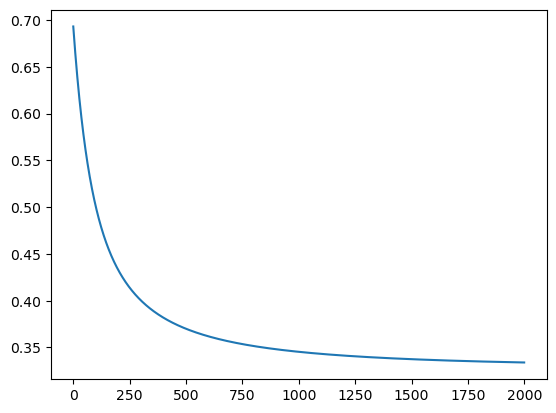

In [88]:
plt.plot(lr_list, cost_list)

In [92]:
X_test_pro = pd.DataFrame(pipeline.fit_transform(X_test), columns = num_cols, index = X_test.index)

In [94]:
X_test_pro["bias"] = 1

z_pred = np.dot(X_test_pro, final_theta)
y_pred = 1/(1+np.exp(-z_pred))

In [99]:
y_pred_final = (y_pred >= 0.5).astype(int)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [103]:
accuracy_score(y_pred_final, y_test)

0.7951219512195122

In [11]:
num_cols.bit_length()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

# Custom logistic regression (OOP)

In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

In [17]:
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate = 1000, alpha = 0.01):
        
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.theta = None
        self.cost_list = []
        self.lr_list = []
        
    def fit(self, X, y):
        
        X["bias"] = 1
        
        self.theta = np.zeros(X.shape[1])
        m = X.shape[0]
        
        for i in range(learning_rate):
            z = np.dot(X, self.theta)
            h_x = 1/(1+np.exp(-z))
            
            cost = (-1/m)*np.sum((y*np.log(h_x)) + ((1-y)* np.log(1-h_x)))
            grad = (1/m)* np.dot(X.T, (h_x - y))
            
            self.theta -= self.alpha*grad
            
            
            self.cost_list.append(i)
            self.lr_list.append(i)
            
        return self
    
    
    def predict(self, X):
        
        X["bias"] = 1
        
        z = np.dot(X, self.theta)
        h_x = 1/(1+np.exp(-z))
        
        return (h_x >= 0.5).astype(int)
    
    def predict_proba(self, X):
        
        X["bias"] = 1
        z = np.dot(X, self.theta)
        h_x = 1/(1+np.exp(-z))
        
        return h_x
    
    
    
    
    

### Adding into the pipeline